In [16]:
import warnings
warnings.filterwarnings("ignore")
import bo_wrangle as wra
import wrangle as w

import pandas as pd
import numpy as np

#splits
from sklearn.model_selection import train_test_split

#visualization
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#statistical
from scipy.stats import chi2_contingency

#scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import precision_score, accuracy_score, recall_score, classification_report

#model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression


In [5]:
df, model_df = get_prep_aa(df)

In [6]:
model_df.sample(50)

,has_name,intake_age,outcome_age,tenure_days,breed,breed_category,mix_breeds,two_breeds,pure_breed,is_tabby,...,primary_color_orange,primary_color_red,primary_color_sable,primary_color_seal point,primary_color_tan,primary_color_tricolor,primary_color_white,age_category_adult,age_category_puppy,age_category_senior
168694,0,37.0,52,15.0,domestic shorthair mix,mix_breeds,mix_breeds,,,1,...,0,0,0,0,0,0,0,0,1,0
153967,1,2556.0,2569,13.0,whippet mix,mix_breeds,mix_breeds,,,0,...,0,0,0,0,0,0,0,1,0,0
60783,1,51.0,66,15.0,domestic shorthair mix,mix_breeds,mix_breeds,,,1,...,0,0,0,0,0,0,0,0,1,0
89172,1,731.0,1113,382.0,pit bull mix,mix_breeds,mix_breeds,,,0,...,0,0,0,0,0,0,0,1,0,0
159916,1,53.0,55,2.0,domestic shorthair mix,mix_breeds,mix_breeds,,,1,...,0,0,0,0,0,0,0,0,1,0
60720,1,45.0,239,194.0,domestic shorthair mix,mix_breeds,mix_breeds,,,0,...,0,0,0,0,0,0,0,0,1,0
132549,1,3106.0,3115,9.0,domestic medium hair mix,mix_breeds,mix_breeds,,,1,...,0,0,0,0,0,0,0,0,0,1
141635,1,1096.0,1103,7.0,domestic shorthair mix,mix_breeds,mix_breeds,,,1,...,0,0,0,0,0,0,0,1,0,0
164960,1,41.0,75,34.0,domestic medium hair,pure_breed,,,pure_breed,1,...,0,0,0,0,0,0,0,0,1,0
159580,1,153.0,157,4.0,dachshund/labrador retriever,two_breeds,,two_breeds,,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144627 entries, 0 to 197203
Data columns (total 51 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   has_name                            144627 non-null  int64 
 1   intake_age                          144627 non-null  object
 2   outcome_age                         144627 non-null  int64 
 3   tenure_days                         144627 non-null  object
 4   breed                               144627 non-null  object
 5   breed_category                      144627 non-null  object
 6   mix_breeds                          144627 non-null  object
 7   two_breeds                          144627 non-null  object
 8   pure_breed                          144627 non-null  object
 9   is_tabby                            144627 non-null  object
 10  mix_color                           144627 non-null  object
 11  outcome_adoption                    144

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144627 entries, 0 to 197203
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   has_name          144627 non-null  int64 
 1   outcome           144627 non-null  object
 2   dob               144627 non-null  object
 3   age_category      144627 non-null  object
 4   species           144627 non-null  object
 5   intake_type       144627 non-null  object
 6   intake_condition  144627 non-null  object
 7   intake_date       144627 non-null  object
 8   outcome_date      144627 non-null  object
 9   intake_age        144627 non-null  object
 10  outcome_age       144627 non-null  int64 
 11  tenure_days       144627 non-null  object
 12  intake_sex        144627 non-null  object
 13  breed             144627 non-null  object
 14  mix_breeds        144627 non-null  int64 
 15  two_breeds        144627 non-null  int64 
 16  pure_breed        144627 non-null  int

# Acquire

In [2]:
merged_data = w.left_join_csv('austin_animal_outcomes.csv', 'austin_animal_intakes.csv', 'merged_data.csv')

In [3]:
df = merged_data

# Prepare

In [5]:
df, model_df = w.prep_df(df)

In [6]:
df.head() 

,dob,outcome,sex,name,intake_type,condition,species,breed,outcome_age,rel_month,rel_year,primary_color,is_tabby,mix_color
0,2017-05-02,adoption,neutered male,1,owner surrender,normal,cat,mix,736,may,2019,brown,1,1
1,2017-07-12,adoption,neutered male,1,stray,normal,dog,mix,371,jul,2018,white,0,1
5,2014-03-12,transfer,intact male,1,stray,medical attention,cat,mix,6,mar,2014,orange,1,0
8,2018-03-01,adoption,neutered male,1,owner surrender,normal,dog,two breeds,797,may,2020,white,0,1
9,2022-05-04,adoption,neutered male,1,stray,normal,cat,mix,76,jul,2022,brown,1,0


In [7]:
model_df.head()

,name,outcome_age,is_tabby,mix_color,outcome_other,outcome_transfer,sex_intact male,sex_neutered male,sex_spayed female,intake_type_euthanasia request,...,primary_color_gray,primary_color_lilac point,primary_color_lynx point,primary_color_orange,primary_color_red,primary_color_sable,primary_color_seal point,primary_color_tan,primary_color_tricolor,primary_color_white
0,1,736,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,371,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,6,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,797,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,76,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.shape

(110079, 14)

In [9]:
model_df.shape

(110079, 57)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110079 entries, 0 to 197201
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   dob            110079 non-null  datetime64[ns]
 1   outcome        110079 non-null  object        
 2   sex            110079 non-null  object        
 3   name           110079 non-null  int64         
 4   intake_type    110079 non-null  object        
 5   condition      110079 non-null  object        
 6   species        110079 non-null  object        
 7   breed          110079 non-null  object        
 8   outcome_age    110079 non-null  int64         
 9   rel_month      110079 non-null  object        
 10  rel_year       110079 non-null  object        
 11  primary_color  110079 non-null  object        
 12  is_tabby       110079 non-null  int64         
 13  mix_color      110079 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usa

In [11]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110079 entries, 0 to 197201
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   name                            110079 non-null  int64
 1   outcome_age                     110079 non-null  int64
 2   is_tabby                        110079 non-null  int64
 3   mix_color                       110079 non-null  int64
 4   outcome_other                   110079 non-null  uint8
 5   outcome_transfer                110079 non-null  uint8
 6   sex_intact male                 110079 non-null  uint8
 7   sex_neutered male               110079 non-null  uint8
 8   sex_spayed female               110079 non-null  uint8
 9   intake_type_euthanasia request  110079 non-null  uint8
 10  intake_type_owner surrender     110079 non-null  uint8
 11  intake_type_public assist       110079 non-null  uint8
 12  intake_type_stray               110079 non-n

In [12]:
train, validate, test = w.split_data(df, "outcome")

train -> (66047, 14), 60.0%
validate -> (22016, 14),20.0%
test -> (22016, 14), 20.0%


# Question and Hypothesis Statement

## Does breed affect whether an animal will be adopted?

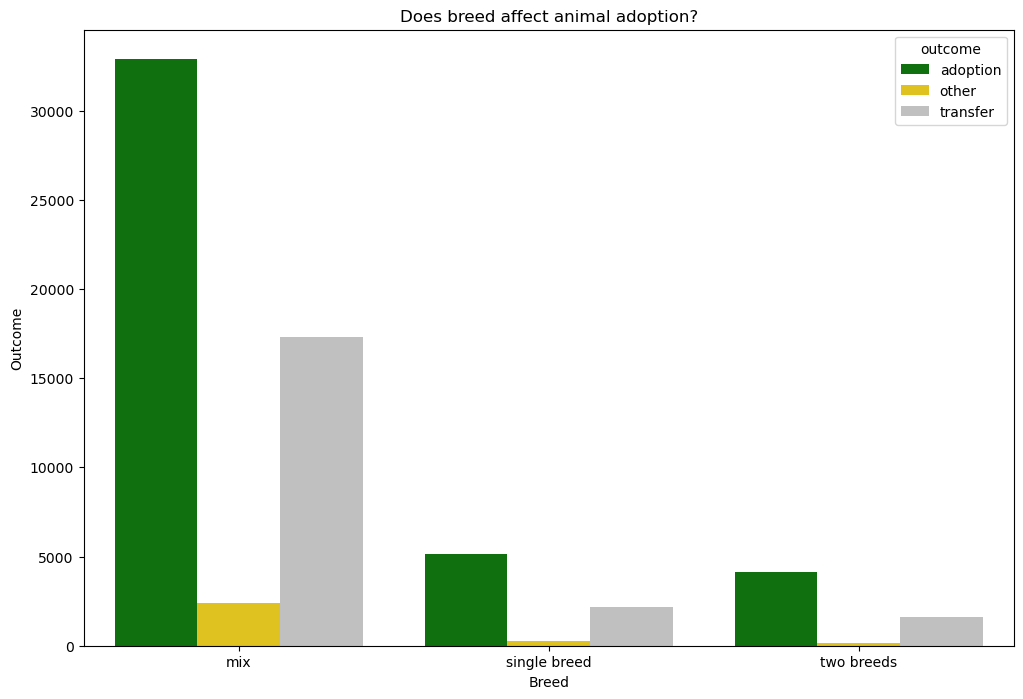

In [19]:
# visualize relationship breed affect adoption
plt.figure(figsize=(12,8))
sns.countplot(x='breed', hue='outcome', data=train, palette=['green', 'gold', 'silver'])
plt.title('Does breed affect animal adoption?')
plt.xlabel('Breed')
plt.ylabel('Outcome')
plt.show()

* Looking at the three breed types there may be some indication that there might be a slight indication of no relationship.
* The chi-squared test of independence tests the null hypothesis that there is no relationship between the two variables (breed and outcome) in the population. If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a significant relationship between the two variables.
* $H0$ = There is no relationship between breed and outcome.
* $Ha$ = There is a relationship between breed and outcome.

In [20]:
# Create a contingency table of breed and outcome
contingency_table = pd.crosstab(train['breed'], train['outcome'])

# Perform a chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-squared test
print('Chi-squared statistic:', chi2)
print('p-value:', p)

Chi-squared statistic: 254.21904352195457
p-value: 8.028187589209715e-54


# Conclusion

# Question and Hypothesis Statement

# Conclusion

# Question and Hypothesis Statement

# Conclusion